<center><h1>World Happiness</h1></center>
<center>CDASO2020U "Data Mining, Machine Learning and Deep Learning"</center>
<center>by Theresa Wohlsen</center>

<center><h1>Structure</h1></center>

A. [Exploratory data analysis](#A)
1. [Variable Identification](#1)
2. [Univariate Analysis](#2)
3. [Bi-variate Analysis](#3)
4. [Missing values treatment](#4)

B. [Pre-processing](#B)
5. [Outlier treatment](#5)
6. [Variable transformation](#6)
7. [Variable creation](#7)
8. [Dimensionality reduction](#8)
9. [Outlier detection](#9)
10. [Principal compoent analysis](#10)
11. [(Lasso) regression](#11)
12. [Random forests](#12)

C. [Supervised Machine Learning](#B)
13. [Data set plit](#13)
14. [Data set plit](#14)


### Used Packages

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
# import seaborn as sns # To be added, when Theresa has her Macbook back
# import plotly.graph_objs as go # To be added, when Theresa has her Macbook back

#unused packages


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

# A. Exploratory data analysis <a class="anchor" id="A"></a>

#### 1. Variable Identification  <a class="anchor" id="1"></a>

In [2]:
# Import CSV
df = pd.read_csv("2015.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
# Identify all columns
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

#### To consider: Renaming all columns by removing the space (e.g "Happiness Score" to "Happiness_Score") for easier handling

In [4]:
# Identify column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
# Count rows and columns
df.shape

(158, 12)

#### 2. Univariate Analysis  <a class="anchor" id="2"></a>

#### 2a. Categorical variables

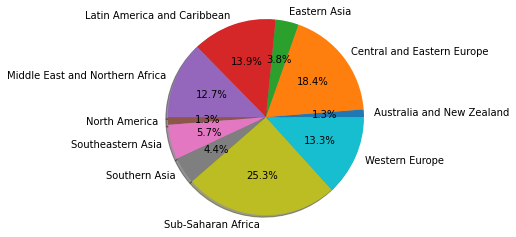

In [6]:
# Creating pie chart to show frequency of region
labels = df['Region'].astype('category').cat.categories.tolist()
counts = df['Region'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

#### 2b. Continuous variables

In [7]:
# Show central tendency and measure dispersion
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


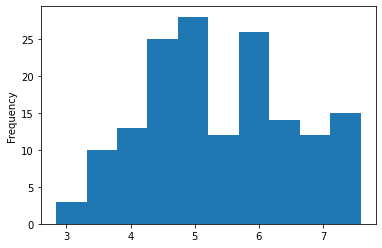

In [8]:
# Visulize continius
df["Happiness Score"].plot.hist()

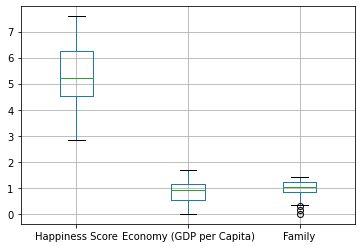

In [9]:
# Create boxplots (Divided in three charts)
boxplot = df.boxplot(column=['Happiness Score', 'Economy (GDP per Capita)', 'Family'])

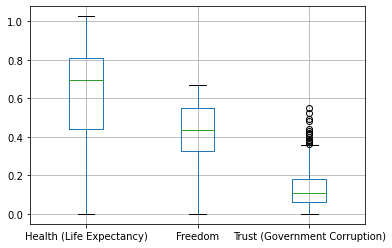

In [10]:
# Create boxplots (Divided in three charts)
boxplot = df.boxplot(column=['Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)'])

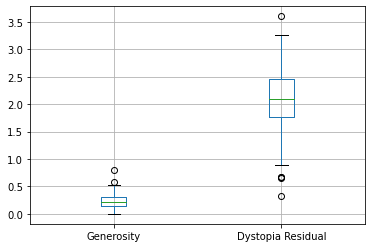

In [11]:
# Create boxplots (Divided in three charts)
boxplot = df.boxplot(column=['Generosity', 'Dystopia Residual'])

#### 3. Bi-variate Analysis  <a class="anchor" id="3"></a>

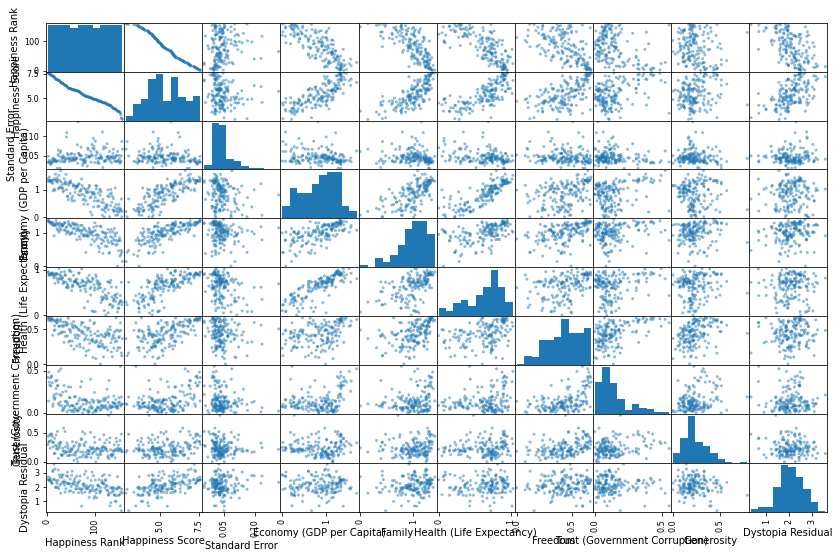

In [12]:
# Create Scatter Matrix
scatter_matrix(df, figsize = (14, 9));

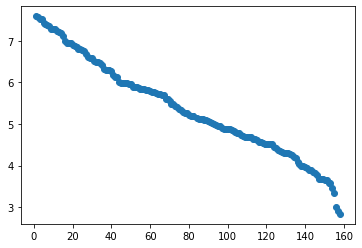

In [13]:
plt.scatter(df["Happiness Rank"], df["Happiness Score"])

In [14]:
### Correlation Matrix
df.corr()

#-1: perfect negative linear correlation
# +1:perfect positive linear correlation and 
# 0: No correlation

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [15]:
### Correlation Heatmap (To be excetuted, when Theresa has her macbook back )

#corrMatrix = df.corr()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()

In [39]:
### Happiness world map (To be excetuted, when Theresa has her macbook back )

""" happiness_data = dict(type = 'choropleth',
            locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country'],
          colorscale = 'Viridis', reversescale = False)
layout = dict(title = 'Happiness Score Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
happiness_map = go.Figure(data = [happiness_data], layout=layout)
iplot(happiness_map) """ 

" data6 = dict(type = 'choropleth', \n           locations = df['Country'],\n           locationmode = 'country names',\n           z = df['Happiness Score'], \n           text = df['Country'],\n          colorscale = 'Viridis', reversescale = False)\nlayout = dict(title = 'Happiness Score Across the World', \n             geo = dict(showframe = False, \n                       projection = {'type': 'Mercator'}))\nchoromap6 = go.Figure(data = [data6], layout=layout)\niplot(choromap6) "

#### To consider: Add Categorical & Continuous for "region" and other factors
Categorical & Continuous: While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables. If levels are small in number, it will not show the statistical significance. To look at the statistical significance we can perform Z-test, T-test or ANOVA

#### To consider for below:
    - Add Title
    - Put all plots in line for better comparison

In [16]:
# Create array with regions
regions = df.Region.unique()
print(regions)

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [17]:
def plot_boxplot_per_region(df):
    boxplot = df.boxplot(column=['Happiness Score'])

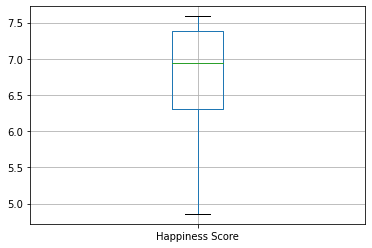

In [18]:
plot_boxplot_per_region(df[df.Region == regions[0]])

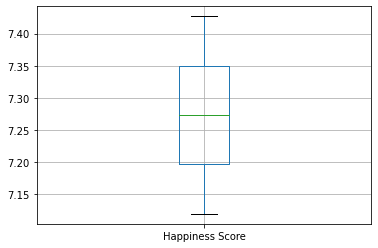

In [19]:
plot_boxplot_per_region(df[df.Region == regions[1]])

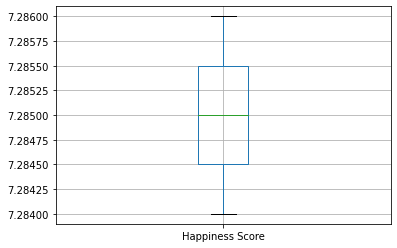

In [20]:
plot_boxplot_per_region(df[df.Region == regions[2]])

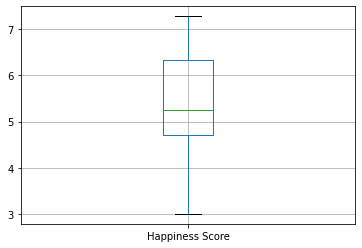

In [21]:
plot_boxplot_per_region(df[df.Region == regions[3]])

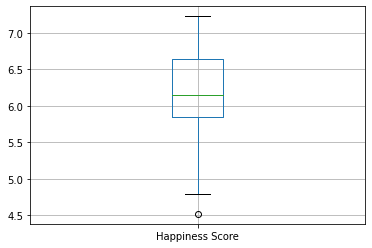

In [22]:
plot_boxplot_per_region(df[df.Region == regions[4]])

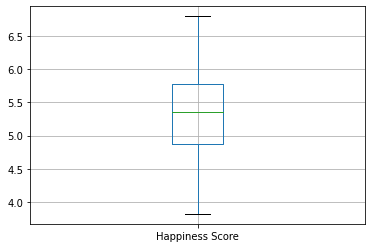

In [23]:
plot_boxplot_per_region(df[df.Region == regions[5]])

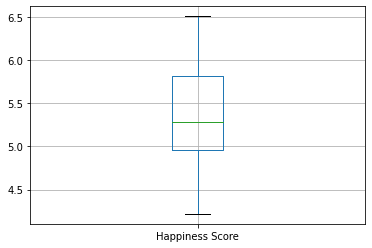

In [24]:
plot_boxplot_per_region(df[df.Region == regions[6]])

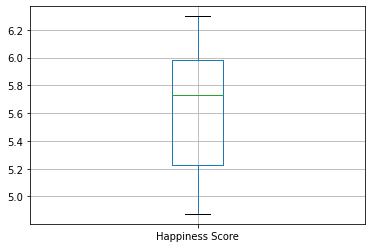

In [25]:
plot_boxplot_per_region(df[df.Region == regions[7]])

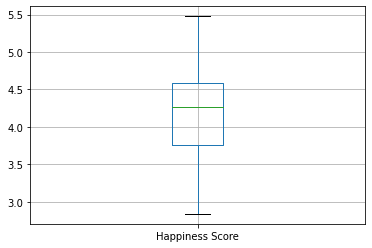

In [26]:
plot_boxplot_per_region(df[df.Region == regions[8]])

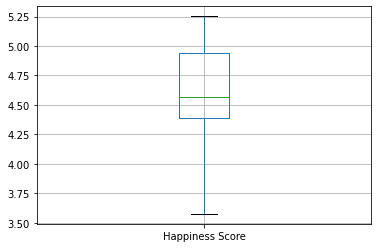

In [27]:
plot_boxplot_per_region(df[df.Region == regions[9]])

 #### 4.Missing Value Treatment <a class="anchor" id="4"></a>

In [28]:
# Count missing value
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# B. Pre-processing  <a class="anchor" id="B"></a>

#### 5. Outlier treatment  <a class="anchor" id="5"></a>

#### 6. Variable transformation  <a class="anchor" id="6"></a>

- Part 1 of  Feature Engineering

Reasons:
1. Data in different scales (this transformation does not change the shape of the variable distribution)
2. When we can transform complex non-linear relationships into linear relationships. Existence of a linear relationship between variables is easier to comprehend compared to a non-linear or curved relation. Transformation helps us to convert a non-linear relation into linear relation. Scatter plot can be used to find the relationship between two continuous variables. These transformations also improve the prediction. Log transformation is one of the commonly used transformation technique used in these situations.
3. Correlation, Analytics, TransformationSymmetric distribution is preferred over skewed distribution as it is easier to interpret and generate inferences. Some modeling techniques requires normal distribution of variables. So, whenever we have a skewed distribution, we can use transformations which reduce skewness. For right skewed distribution, we take square / cube root or logarithm of variable and for left skewed, we take square / cube or exponential of variables.Log Transformation, Analytics, Transformation
4. Variable Transformation is also done from an implementation point of view (Human involvement). Let’s understand it more clearly. In one of my project on employee performance, I found that age has direct correlation with performance of the employee i.e. higher the age, better the performance. From an implementation stand point, launching age based progamme might present implementation challenge. However, categorizing the sales agents in three age group buckets of <30 years, 30-45 years and >45  and then formulating three different strategies for each group is a judicious approach. This categorization technique is known as Binning of Variables.


Options: 
- Logarithm: Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values as well.
- Square / Cube root: The square and cube root of a variable has a sound effect on variable distribution. However, it is not as significant as logarithmic transformation. Cube root has its own advantage. It can be applied to negative values including zero. Square root can be applied to positive values including zero.
- Binning: It is used to categorize variables. It is performed on original values, percentile or frequency. Decision of categorization technique is based on business understanding. For example, we can categorize income in three categories, namely: High, Average and Low. We can also perform co-variate binning which depends on the value of more than one variables.

#### 7. Variable creation  <a class="anchor" id="7"></a>
- Part 2 of  Feature Engineering

To consider: Creating derived variables

To Do: Creating dummy variables for region

#### 8. Dimensionality reduction <a class="anchor" id="8"></a>

Answer: Not required

Based on: analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
- Space required to store the data is reduced as the number of dimensions comes down
- Less dimensions lead to less computation/training time
- Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful
- It takes care of multicollinearity by removing redundant features. For example, you have two variables – ‘time spent on treadmill in minutes’ and ‘calories burnt’. These variables are highly correlated as the more time you spend running on a treadmill, the more calories you will burn. Hence, there is no point in storing both as just one of them does what you require
- It helps in visualizing data. As discussed earlier, it is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly

#### 9. Outlier detection  <a class="anchor" id="9"></a>

#### 10. Principal compoent analysis <a class="anchor" id="10"></a>

#### 11. (Lasso) regression  <a class="anchor" id="11"></a>

#### 12. Random forests  <a class="anchor" id="12"></a>

# C. Supervised Machine Learning  <a class="anchor" id="C"></a>

#### 13. Data set split  <a class="anchor" id="13"></a>

In [29]:
def prepare_test_sets(df):
    # select features only looking at the first cell nucleus
    features = ['Standard Error', 'Economy (GDP per Capita)',
                'Family', 'Health (Life Expectancy)', 'Freedom',
                'Trust (Government Corruption)','Generosity', 'Dystopia Residual']
    X = df[features]
    y = df['Happiness Score']

    #Perform train/test split.
    xTrain, xTest, yTrain, yTest = train_test_split(X, y)
    
    return xTrain, xTest, yTrain, yTest

In [30]:
xTrain, xTest, yTrain, yTest = prepare_test_sets(df)